In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
aisles_df = pd.read_csv('../data/original/aisles.csv')
departments_df = pd.read_csv('../data/original/departments.csv')

order_products_prior_df = pd.read_csv('../data/original/order_products__prior.csv')
order_products_train_df = pd.read_csv('../data/original/order_products__train.csv')

orders_df = pd.read_csv('../data/original/orders.csv')
products_df = pd.read_csv('../data/original/products.csv')

In [30]:
all_order_products_df = pd.concat([order_products_prior_df, order_products_train_df])

In [32]:
orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [12]:
orders_df[orders_df['days_since_prior_order'] == 0]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
8,2295261,1,prior,9,1,16,0.0
43,2557754,4,prior,5,5,13,0.0
189,2148135,17,prior,30,6,15,0.0
296,965160,24,train,19,0,16,0.0
337,3162630,27,prior,24,2,15,0.0
342,654294,27,prior,29,3,14,0.0
355,1374792,27,prior,42,5,14,0.0
356,1849805,27,prior,43,5,15,0.0
362,1067581,27,prior,49,3,14,0.0
382,2999232,27,prior,69,2,14,0.0


In [43]:
orders_df.loc[388:389]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
388,264488,27,prior,75,1,11,10.0
389,3276527,27,prior,76,1,14,0.0


In [52]:
prior_df = all_order_products_df[all_order_products_df['order_id'] == 264488]

In [ ]:
def combineOrder(series):
    

In [54]:
zero_df = all_order_products_df[all_order_products_df['order_id'] == 3276527]

In [57]:
common_products = set(prior_df['product_id']) & set(zero_df['product_id'])

In [ ]:
# 删除common_products
all_order_products_df[all_order_products_df['order_id'] == 264488].drop(common_products, inplace=True)

In [62]:
#修改order_id
change_indexs = all_order_products_df[all_order_products_df['order_id'] == 3276527].index
all_order_products_df.loc[change_indexs, 'order_id'] = 264488
all_order_products_df.loc[change_indexs]

,order_id,product_id,add_to_cart_order,reordered
31063075,264488,14086,1,0
31063076,264488,16290,2,1
31063077,264488,37552,3,1
31063078,264488,14766,4,1
31063079,264488,8615,5,1
31063080,264488,37103,6,1
31063081,264488,5708,7,1
31063082,264488,30908,8,1


,order_id,product_id,add_to_cart_order,reordered
31063075,3276527,14086,1,0
31063076,3276527,16290,2,1
31063077,3276527,37552,3,1
31063078,3276527,14766,4,1
31063079,3276527,8615,5,1
31063080,3276527,37103,6,1
31063081,3276527,5708,7,1
31063082,3276527,30908,8,1


In [ ]:

product_series = order_product_df[order_product_df['order_id'] == zero_series.order_id]


In [4]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [50]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [7]:
order_products_train_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [8]:
orders_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [9]:
products_df.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [11]:
all_order_products_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


### In proir train all set ,the top ten popular products

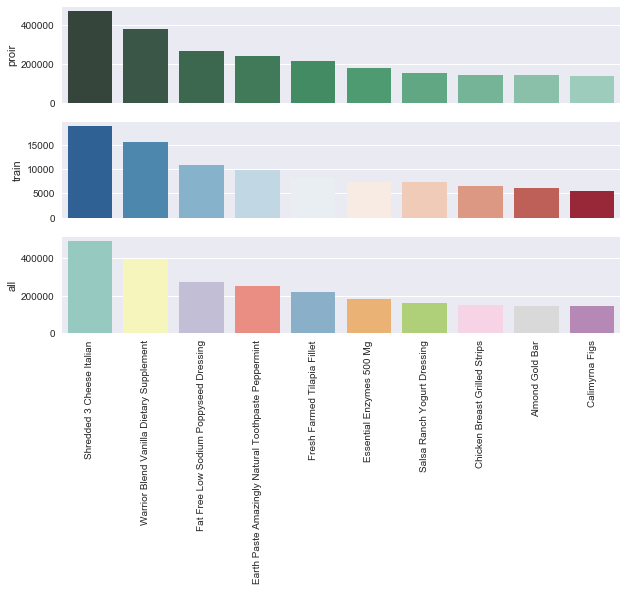

In [12]:
hot_product_proir_df = pd.DataFrame(order_products_prior_df.product_id.value_counts()).rename(columns={'product_id':'count'}).sort_values('count', ascending=False)
hot_product_train_df = pd.DataFrame(order_products_train_df.product_id.value_counts()).rename(columns={'product_id':'count'}).sort_values('count', ascending=False)
hot_product_all_df = pd.DataFrame(all_order_products_df.product_id.value_counts()).rename(columns={'product_id':'count'}).sort_values('count', ascending=False)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

x1 = products_df.loc[hot_product_proir_df.head(10).index]['product_name'].values
sns.barplot(x1, hot_product_proir_df.head(10)['count'].values, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("proir")

x2 = products_df.loc[hot_product_train_df.head(10).index]['product_name'].values
sns.barplot(x2, hot_product_train_df.head(10)['count'].values, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("train")

x3 = products_df.loc[hot_product_all_df.head(10).index]['product_name'].values
sns.barplot(x3, hot_product_all_df.head(10)['count'].values, palette="Set3", ax=ax3)
ax3.set_ylabel("all")

# Finalize the plot
sns.despine(bottom=True)

plt.xticks(rotation='vertical')
plt.show()

### How many products in each order

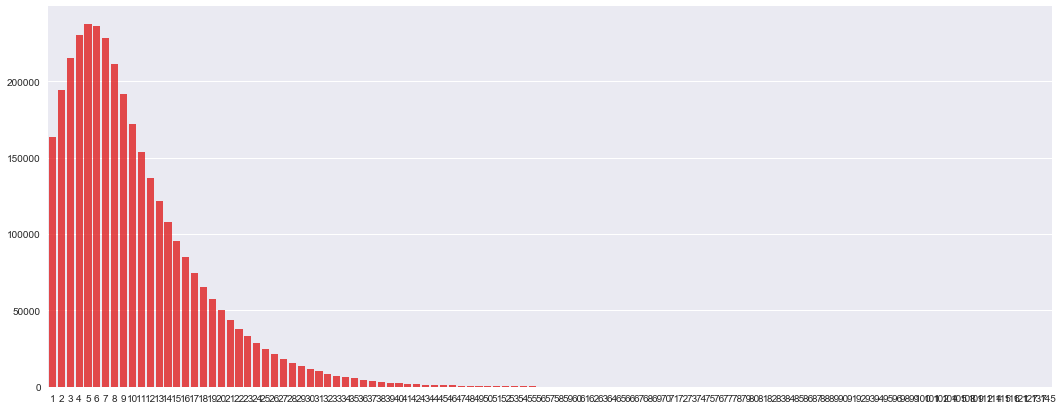

In [13]:
all_order_groupby = all_order_products_df.groupby('order_id')
all_product_count_df = all_order_groupby['add_to_cart_order'].aggregate(np.max).reset_index()

all_product_count_sum_df = all_product_count_df['add_to_cart_order'].value_counts()
    
f, ax = plt.subplots(1, 1, figsize=(18, 7))
sns.barplot(all_product_count_sum_df.index, all_product_count_sum_df.values, alpha=0.8, color='r')
plt.show()

In [7]:
orders_order_product_df = pd.merge(orders_df, all_order_products_df, left_on='order_id', right_on='order_id')

### How many precent about reordered products in train_order_products
reordered is mean user bought it in any previous order 

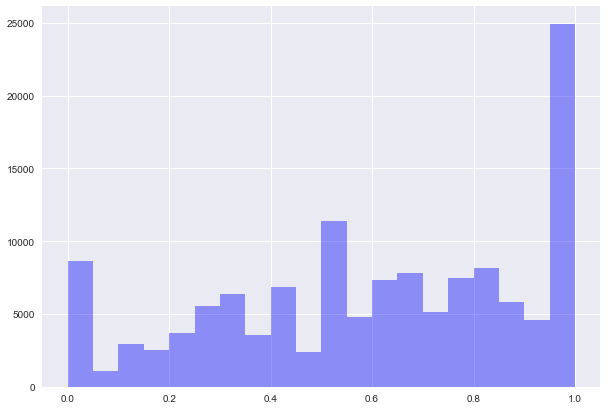

In [32]:
train_orders_order_product_groupby = orders_order_product_df[orders_order_product_df['eval_set'] == 'train'].groupby('user_id')
user_reordered_precent_df = train_orders_order_product_groupby['reordered'].aggregate(np.sum) / train_orders_order_product_groupby['reordered'].count()

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.distplot(user_reordered_precent_df.values, bins=20, kde=False, color="b", ax=ax)
plt.show()

### How many orders every user

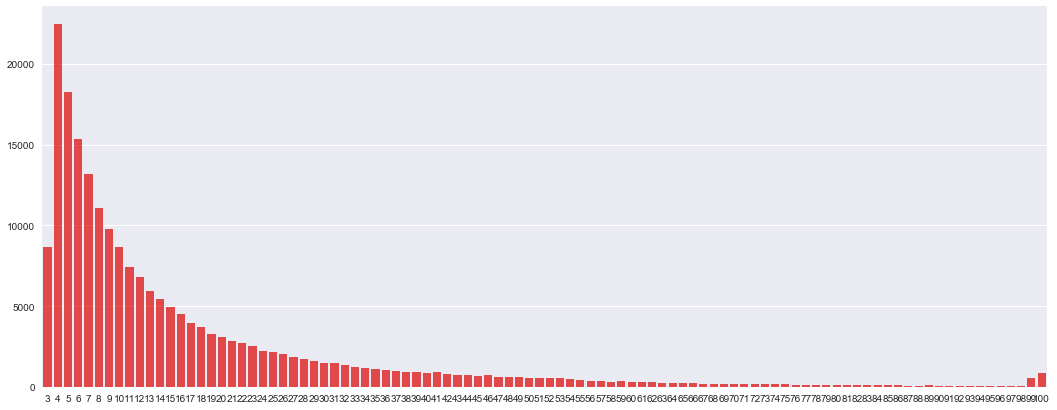

In [44]:
user_orders_order_product_groupby = orders_order_product_df.groupby('user_id')
user_order_number_df = user_orders_order_product_groupby['order_number'].aggregate(np.max)
user_order_number_count_df = user_order_number_df.value_counts()

plt.subplots(1, 1, figsize=(18, 7))
sns.barplot(user_order_number_count_df.index, user_order_number_count_df.values, alpha=0.8, color='r')
plt.show()

### How many orders in every day of week

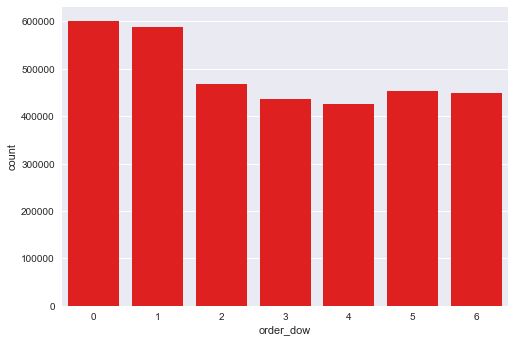

In [45]:
sns.countplot(x="order_dow", data=orders_df, color='r')
plt.show()

### How many orders every hour of day

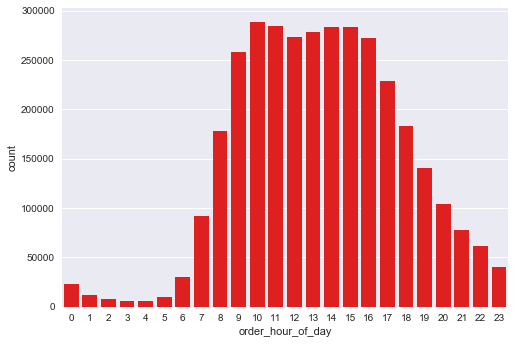

In [46]:
sns.countplot(x="order_hour_of_day", data=orders_df, color='r')
plt.show()

### How many days since prior order

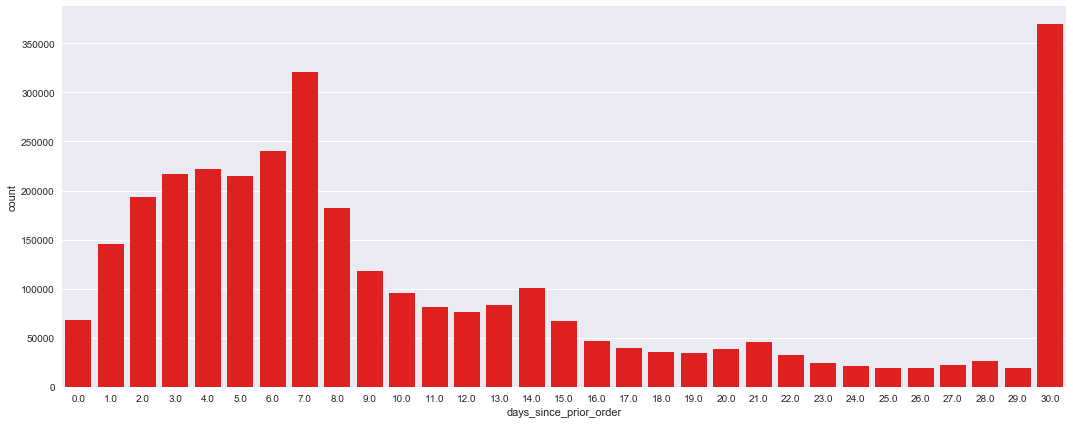

In [48]:
plt.subplots(1, 1, figsize=(18, 7))
sns.countplot(x="days_since_prior_order", data=orders_df, color='r')
plt.show()

In [51]:
temp_df = pd.merge(order_products_train_df, products_df, left_on='product_id', right_on='product_id')
temp_df = pd.merge(temp_df, aisles_df, left_on='aisle_id', right_on='aisle_id')
order_product_aisle_department_df = pd.merge(temp_df, departments_df, left_on='department_id', right_on='department_id')

produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
bulk                 1359
Name: department, dtype: int64

### The top twenty popular podepartment 

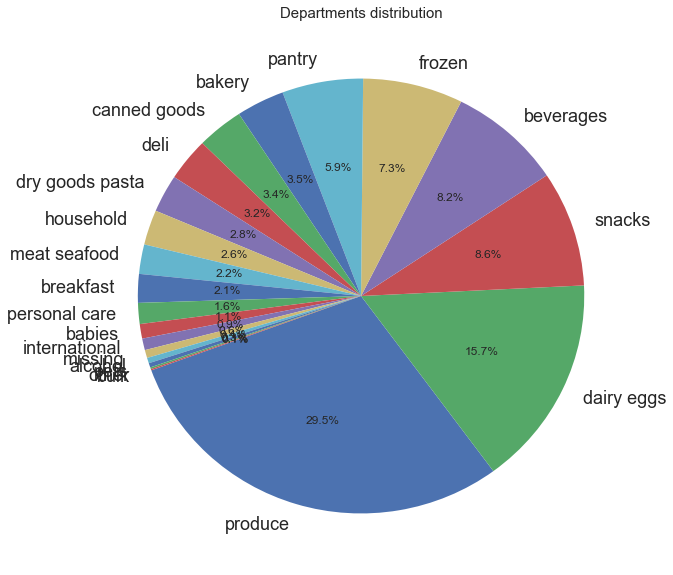

In [74]:
order_department_series = order_product_aisle_department_df['department'].value_counts()

plt.figure(figsize=(10,10))
labels = (np.array(order_department_series.index))
sizes = (np.array((order_department_series / order_department_series.sum())*100))
patches,l_text,p_text = plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)

for t in l_text:
    t.set_size(18)

plt.show()

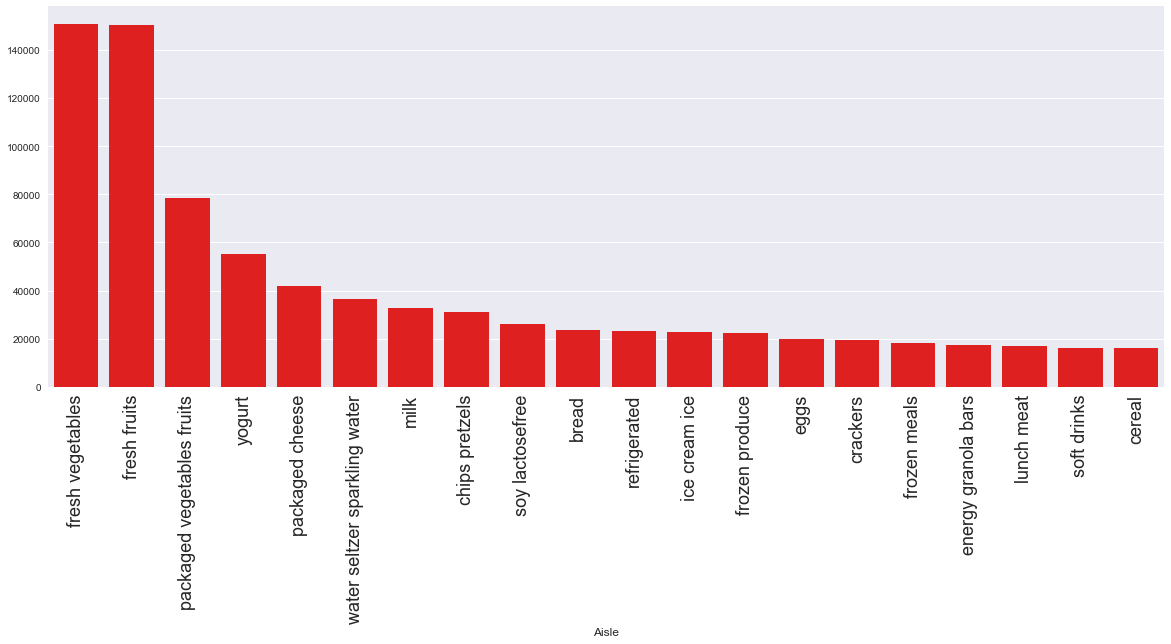

In [64]:
order_aisle_df = order_product_aisle_department_df['aisle'].value_counts().head(20)

plt.subplots(1, 1, figsize=(20, 7))
sns.barplot(order_aisle_df.index, order_aisle_df.values, color='r')
plt.xticks(rotation='vertical', fontsize=18)
plt.xlabel('Aisle', fontsize=15)
plt.show()

In [1]:
orders_df

NameError: name 'orders_df' is not defined